In [1]:
pip install pandas matplotlib seaborn numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
# Load the datasets
bookings_df = pd.read_csv('Bookings.csv')
sessions_df = pd.read_csv('Sessions.csv')


In [4]:
#1.Find the number of distinct bookings, sessions, and searches.

distinct_bookings = bookings_df['booking_id'].nunique()
distinct_sessions = sessions_df['session_id'].nunique()
distinct_searches = sessions_df['search_id'].nunique()

print(f"Distinct Bookings: {distinct_bookings}")
print(f"Distinct Sessions: {distinct_sessions}")
print(f"Distinct Searches: {distinct_searches}")

Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360


In [5]:
#2. How many sessions have more than one booking?

# Count bookings per session
session_booking_counts = sessions_df.groupby('session_id')['booking_id'].nunique()
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1].count()

print(f"Sessions with more than one booking: {sessions_with_multiple_bookings}")


Sessions with more than one booking: 10


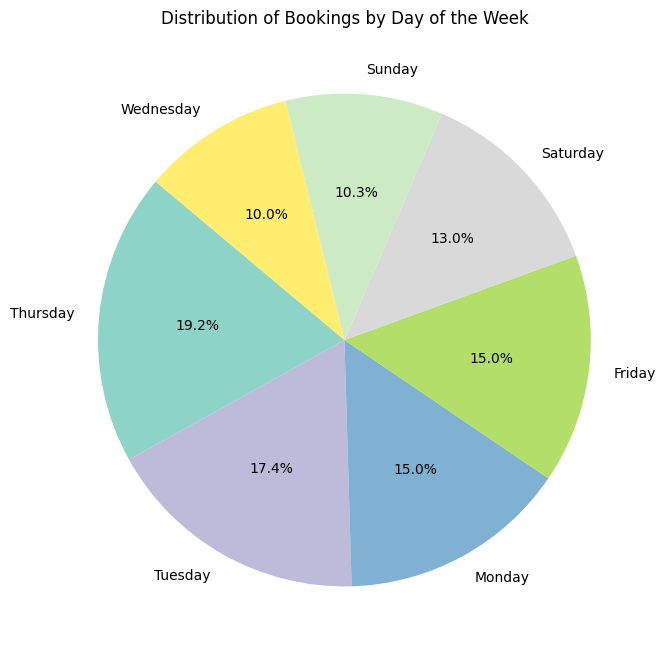

In [6]:
#3. Which days of the week have the highest number of bookings?


bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])
bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()

# Count bookings per day
day_counts = bookings_df['day_of_week'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
day_counts.plot.pie(autopct='%1.1f%%', startangle=140, colormap="Set3")
plt.title('Distribution of Bookings by Day of the Week')
plt.ylabel('')
plt.show()


In [7]:
#4. Total bookings and Gross Booking Value for each service name.

service_summary = bookings_df.groupby('service_name').agg({
    'booking_id': 'count',
    'INR_Amount': 'sum'
}).rename(columns={'booking_id': 'Total Bookings', 'INR_Amount': 'Gross Booking Value (INR)'})

print(service_summary)


              Total Bookings  Gross Booking Value (INR)
service_name                                           
GOIBIBO                  186                 5897637.97
MMT                       48                  665669.08
YATRA                    105                 3378702.13


In [8]:
#5. Most booked route for customers with more than one booking.

# Customers with more than one booking
multi_booking_customers = bookings_df.groupby('customer_id')['booking_id'].nunique()
multi_booking_customers = multi_booking_customers[multi_booking_customers > 1].index

# Filter and find most booked route
filtered_bookings = bookings_df[bookings_df['customer_id'].isin(multi_booking_customers)]
most_booked_route = filtered_bookings.groupby(['from_city', 'to_city']).size().idxmax()

print(f"Most booked route: {most_booked_route}")


Most booked route: ('Gurgaon', 'Roissy-en-France')


In [9]:
#6. Top 3 departure cities for advance bookings.

# Filter for advance bookings (days_to_departure > 0)
filtered_departures = bookings_df[bookings_df['days_to_departure'] > 0]

# Count departures per city
departure_counts = filtered_departures.groupby('from_city').size()
top_cities = departure_counts[departure_counts >= 5].nlargest(3)

print("Top 3 Departure Cities:")
print(top_cities)


Top 3 Departure Cities:
from_city
Gurgaon    131
Mumbai      34
Delhi       29
dtype: int64


The highest correlation is 0.62, between the columns: INR_Amount and distance_km.


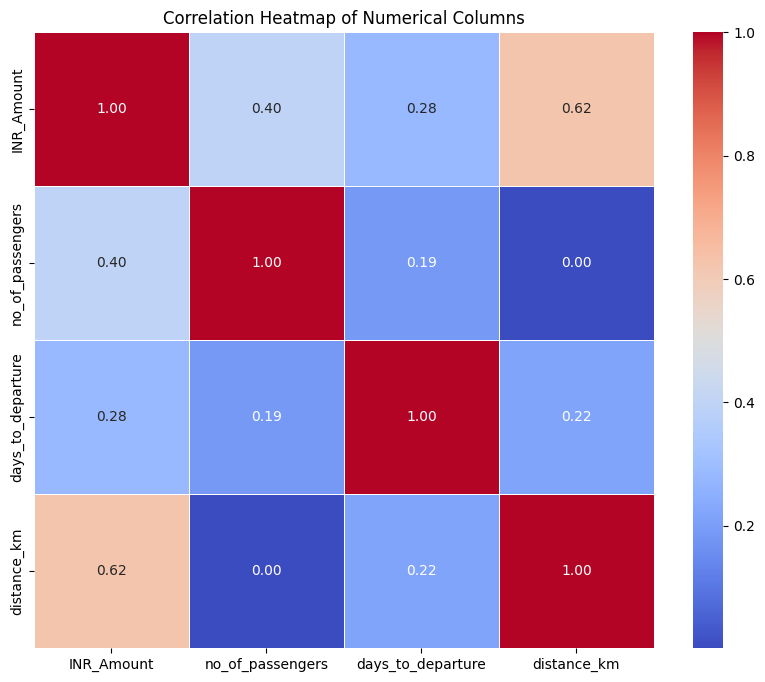

In [10]:
#7. Heatmap for correlations.


# Calculate the correlation matrix for numerical columns
correlation_matrix = bookings_df.select_dtypes(include=['number']).corr()

# Identify the pair of columns with the maximum correlation (excluding the diagonal)
correlation_matrix_unstacked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_unstacked.max().max()  # Maximum correlation value
max_corr_pair = correlation_matrix_unstacked.stack().idxmax()  # Pair of columns with maximum correlation

# Print the pair of columns with the highest correlation and the value
print(f"The highest correlation is {max_corr:.2f}, between the columns: {max_corr_pair[0]} and {max_corr_pair[1]}.")

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


In [11]:
#8. Most used device type for each service.

most_used_device = bookings_df.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts().idxmax())

print("Most Used Device Type for Each Service:")
print(most_used_device)


Most Used Device Type for Each Service:
service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
Name: device_type_used, dtype: object


/tmp/ipykernel_19803/702166714.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings_df['quarter'] = bookings_df['booking_time'].dt.to_period('Q')


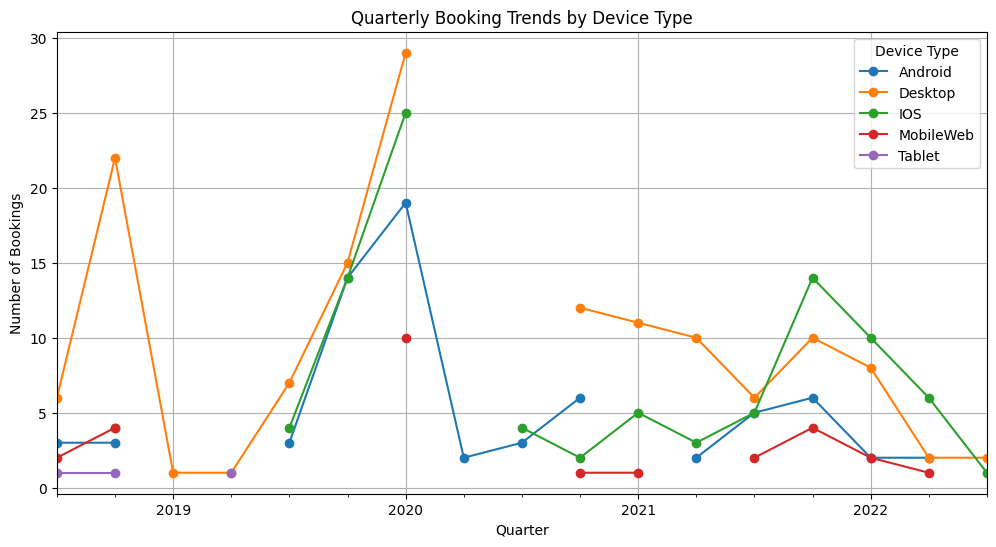

In [12]:
#9. Quarterly trends for bookings by device type.

# Add quarter and year columns
bookings_df['quarter'] = bookings_df['booking_time'].dt.to_period('Q')

# Count bookings per device and quarter
quarterly_trends = bookings_df.groupby(['quarter', 'device_type_used']).size().unstack()

# Plot trends
quarterly_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Quarterly Booking Trends by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.grid()
plt.show()


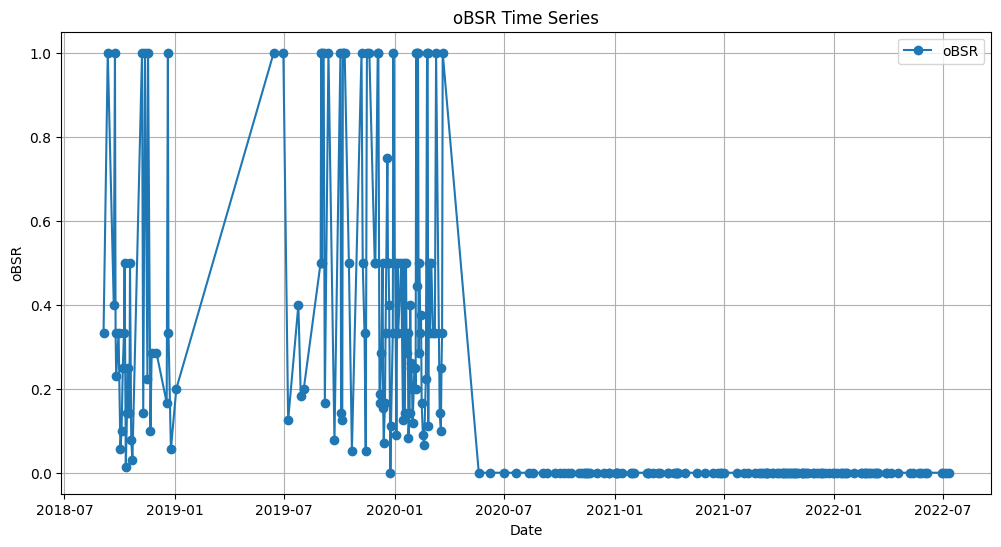

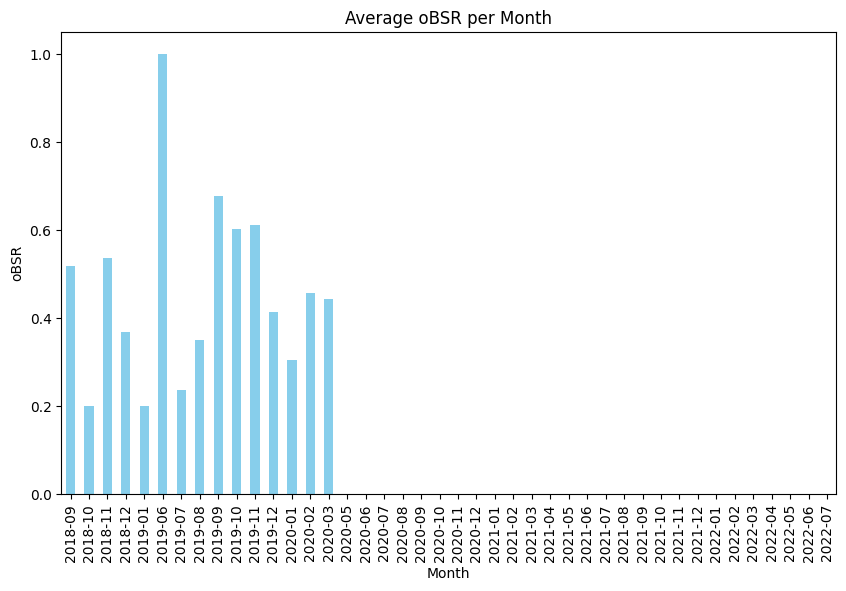

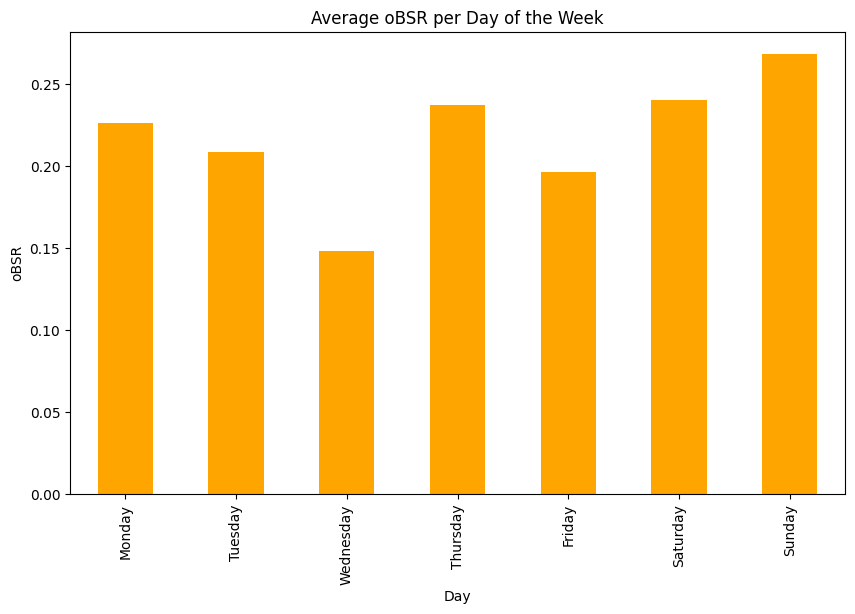

Average oBSR per Month:
month
2018-09    0.518681
2018-10    0.199755
2018-11    0.535828
2018-12    0.368254
2019-01    0.200000
2019-06    1.000000
2019-07    0.235606
2019-08    0.350000
2019-09    0.677656
2019-10    0.602561
2019-11    0.610746
2019-12    0.414422
2020-01    0.304959
2020-02    0.456470
2020-03    0.443651
2020-05    0.000000
2020-06    0.000000
2020-07    0.000000
2020-08    0.000000
2020-09    0.000000
2020-10    0.000000
2020-11    0.000000
2020-12    0.000000
2021-01    0.000000
2021-02    0.000000
2021-03    0.000000
2021-04    0.000000
2021-05    0.000000
2021-06    0.000000
2021-07    0.000000
2021-08    0.000000
2021-09    0.000000
2021-10    0.000000
2021-11    0.000000
2021-12    0.000000
2022-01    0.000000
2022-02    0.000000
2022-03    0.000000
2022-04    0.000000
2022-05    0.000000
2022-06    0.000000
2022-07    0.000000
Freq: M, Name: oBSR, dtype: float64

Average oBSR per Day of the Week:
day_of_week
Monday       0.226098
Tuesday      0.208763
Wed

In [13]:
#10. Overall Booking-to-Search Ratio (oBSR).

#   Calculate oBSR:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
bookings_df = pd.read_csv("Bookings.csv", parse_dates=["booking_time"])
sessions_df = pd.read_csv("Sessions.csv", parse_dates=["search_time"])

# Ensure timestamps are in datetime format
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'], errors='coerce')
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], errors='coerce')

# Create counts of searches and bookings per day
search_count = sessions_df.groupby(sessions_df['search_time'].dt.date).size()
booking_count = bookings_df.groupby(bookings_df['booking_time'].dt.date).size()

# Combine search and booking counts into a single DataFrame
obsr_df = pd.DataFrame({'searches': search_count, 'bookings': booking_count}).fillna(0)

# Calculate oBSR and handle division by zero
obsr_df['oBSR'] = obsr_df.apply(lambda x: x['bookings'] / x['searches'] if x['searches'] > 0 else 0, axis=1)

# Ensure the index is in datetime format and drop invalid rows
obsr_df.index = pd.to_datetime(obsr_df.index, errors='coerce')
obsr_df = obsr_df.dropna()

# Average oBSR per month
obsr_df['month'] = obsr_df.index.to_period('M')
average_obsr_monthly = obsr_df.groupby('month')['oBSR'].mean().sort_index()

# Average oBSR per day of the week
obsr_df['day_of_week'] = obsr_df.index.to_series().dt.day_name()
average_obsr_weekly = obsr_df.groupby('day_of_week')['oBSR'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot oBSR time series
plt.figure(figsize=(12, 6))
plt.plot(obsr_df.index, obsr_df['oBSR'], marker='o', label='oBSR')
plt.title('oBSR Time Series')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.legend()
plt.grid()
plt.show()

# Plot Average oBSR per Month
average_obsr_monthly.plot(kind='bar', figsize=(10, 6), title='Average oBSR per Month', ylabel='oBSR', xlabel='Month', color='skyblue')
plt.show()

# Plot Average oBSR per Day of the Week
average_obsr_weekly.plot(kind='bar', figsize=(10, 6), title='Average oBSR per Day of the Week', ylabel='oBSR', xlabel='Day', color='orange')
plt.show()

# Print the Results
print("Average oBSR per Month:")
print(average_obsr_monthly)
print("\nAverage oBSR per Day of the Week:")
print(average_obsr_weekly)
